# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [6]:
data = pd.read_csv('data/train.csv')

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3972,72,48.90,3527,Male,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,No,Mailed check,0
998,5,65.60,339.9,Male,0,No,No,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
1927,4,29.65,118.5,Male,0,No,No,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,1
1194,67,105.05,7171.7,Male,1,No,No,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,0
2411,3,74.60,239.05,Female,1,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
1155,24,93.15,2231.05,Male,1,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1071,13,20.20,273.25,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1192,1,45.15,45.15,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
3282,1,24.45,24.45,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
4854,23,79.15,1676.95,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [9]:
data.shape

(5282, 20)

In [10]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [11]:
data.TotalSpent

0       1026.35
1        1872.2
2          75.9
3          2570
4       6758.45
         ...   
5277      82.15
5278    2188.45
5279      55.05
5280    2215.25
5281     1375.6
Name: TotalSpent, Length: 5282, dtype: object

In [12]:
data[data.TotalSpent == ' '] 

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [13]:
data.loc[data.TotalSpent == ' ', 'TotalSpent'] = 0

In [14]:
data[data.TotalSpent == 0] 

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,0,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,0,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,0,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,0,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [15]:
data.TotalSpent = data.TotalSpent.astype(float)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

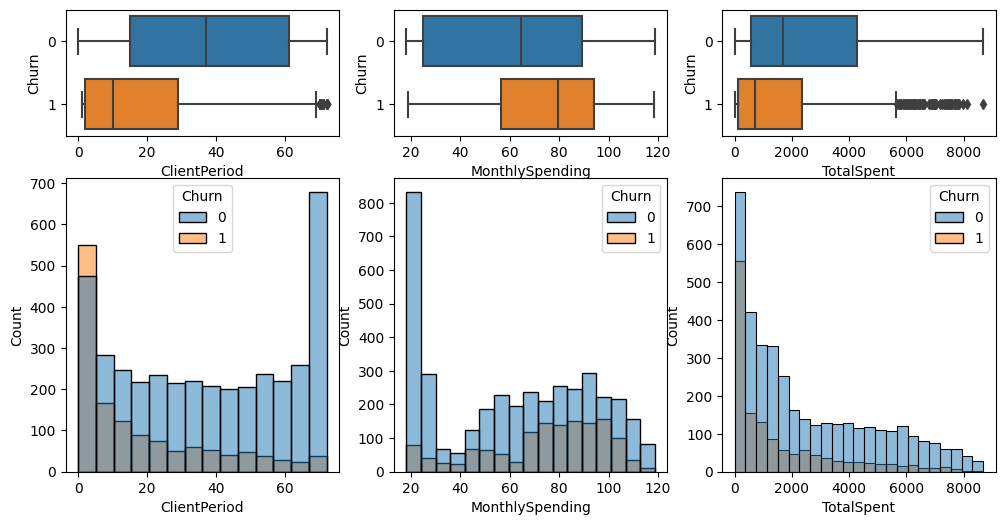

In [16]:
def plot_num_data(data, cols):
    plt.rcParams['figure.figsize'] = [12, 6]
    f, ax = plt.subplots(nrows=2, ncols=3, sharex=False, gridspec_kw={"height_ratios": (.3, .7)})
    for i, col in enumerate(cols):
        sns.boxplot(data=data, x=col, ax=ax[0][i], y=target_col, orient='h')
        sns.histplot(data=data, x=col, hue=target_col, ax=ax[1][i])
    plt.show()
    
    
plot_num_data(data, num_cols)

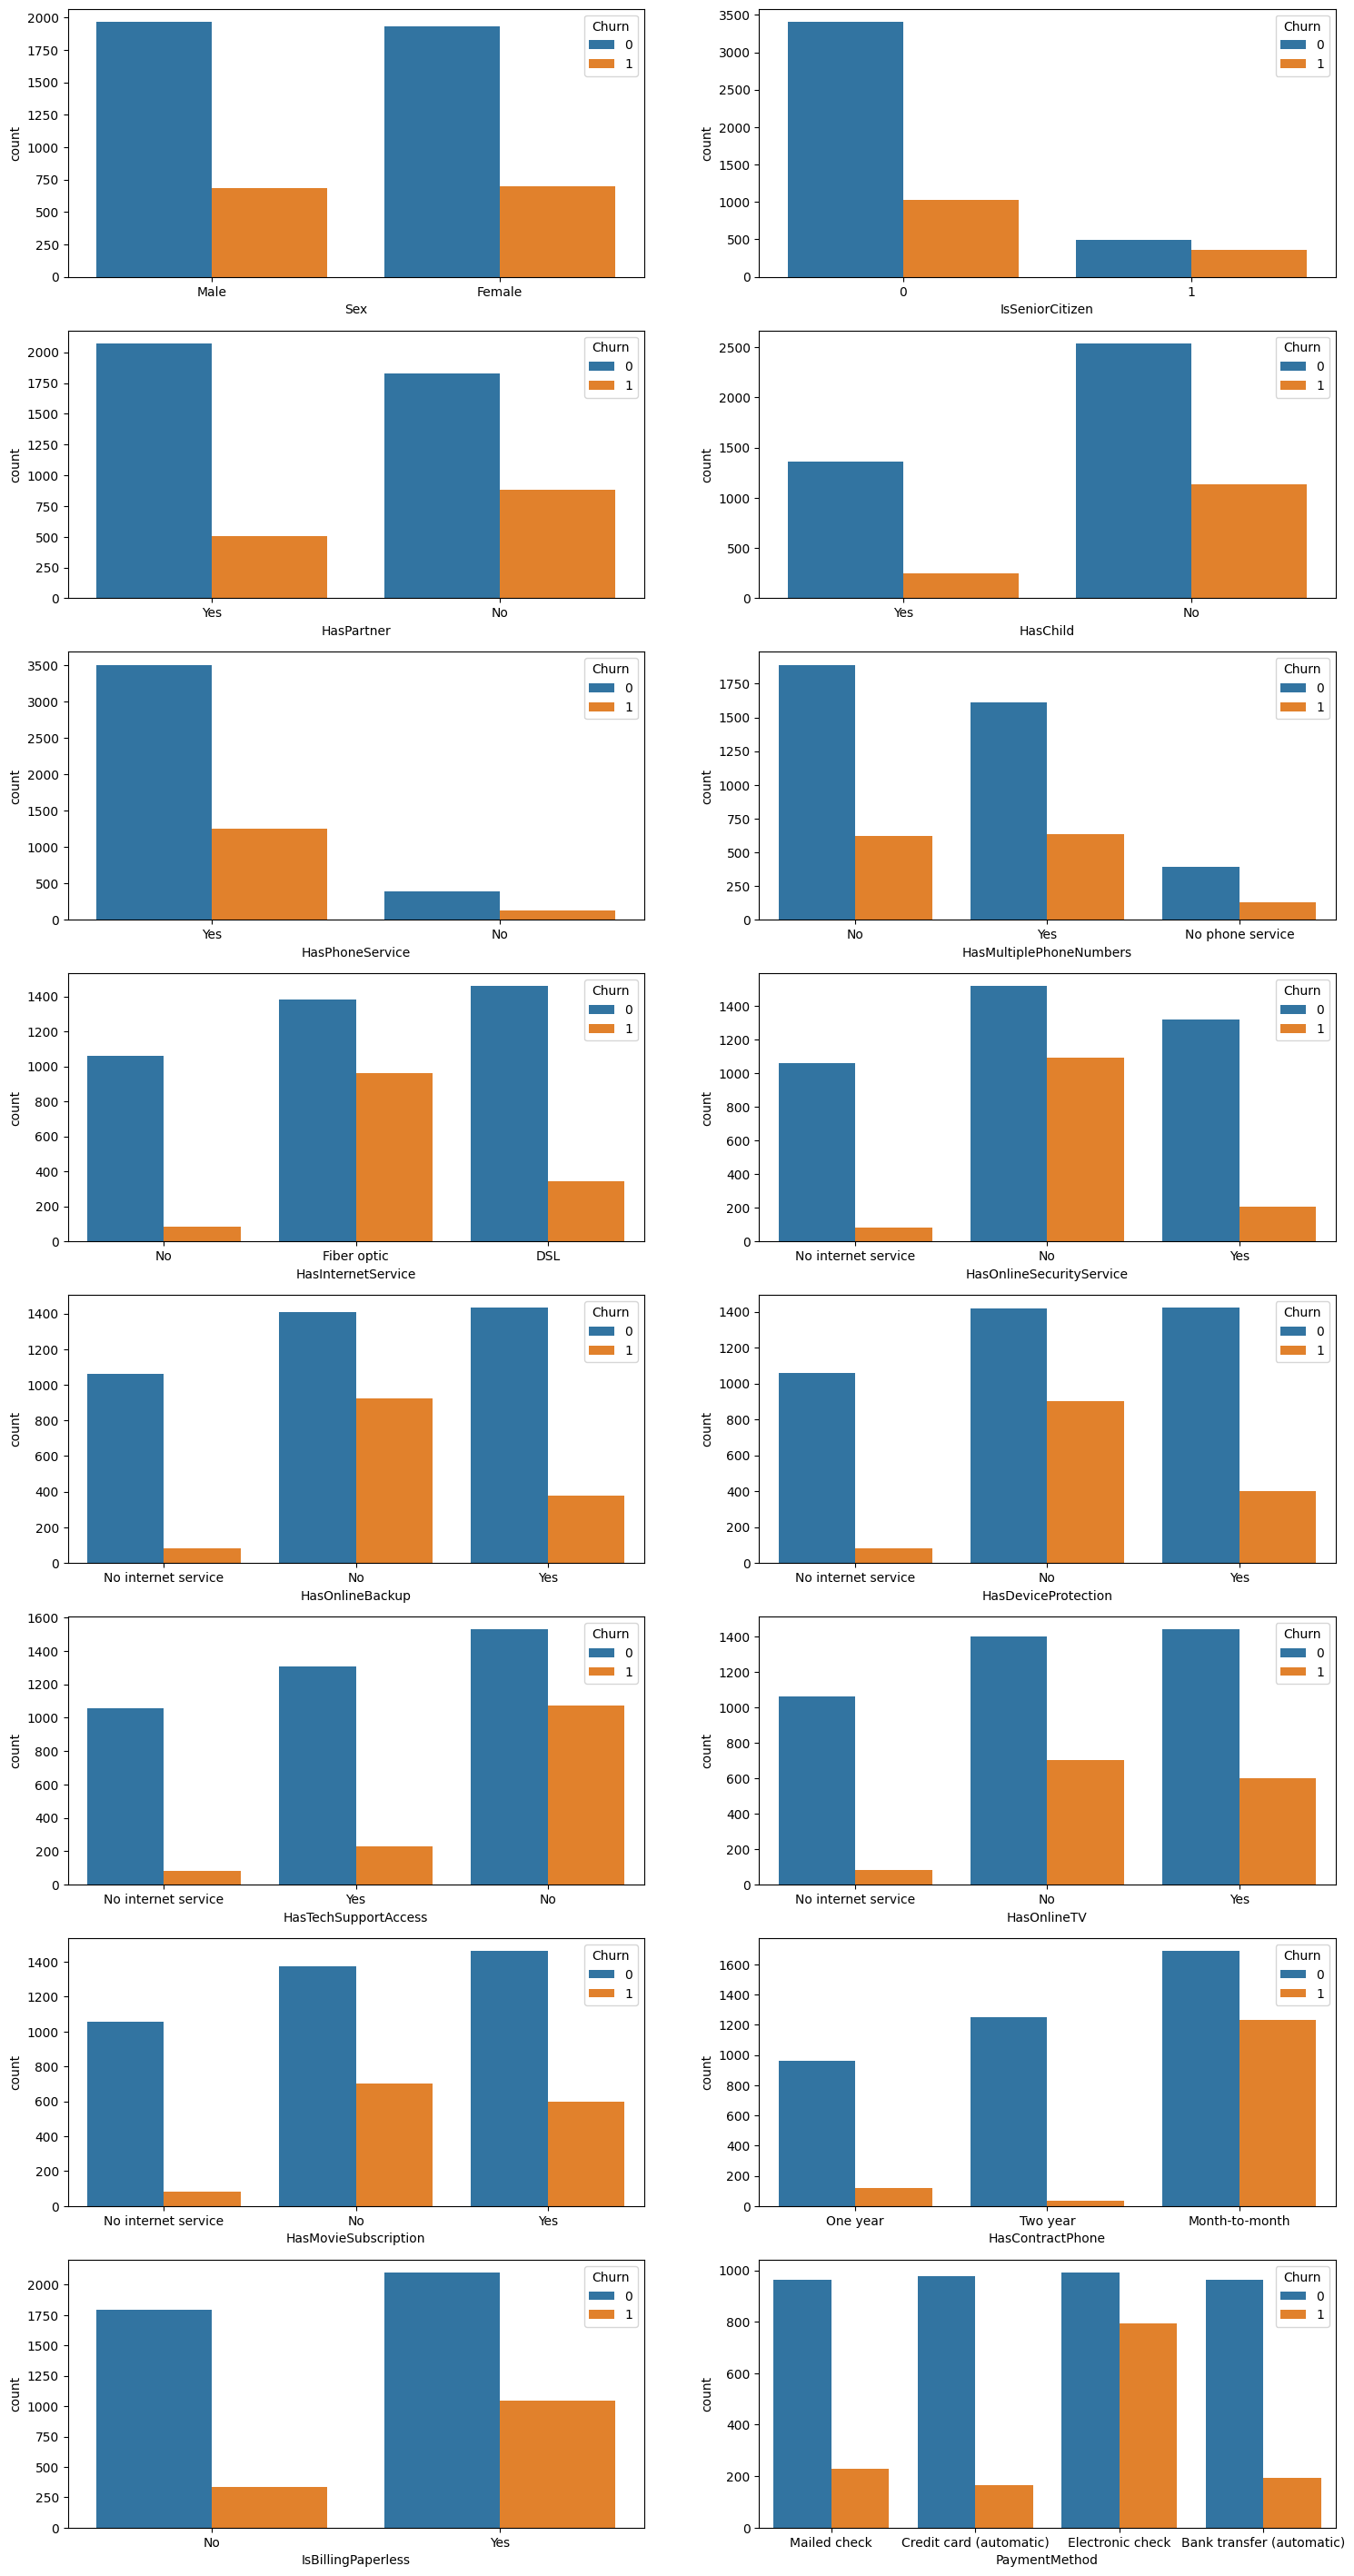

In [17]:
plt.rcParams['figure.figsize'] = [18, 36]
f, ax = plt.subplots(nrows=8, ncols=2, sharex=False)

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=data[col], ax=ax[i // 2][i % 2], hue=target_col)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve
from catboost import Pool

In [50]:
X = data.drop(target_col, axis=1)
y = data[target_col]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=123)


In [20]:
col_tr = ColumnTransformer(
    [
        ("scaler", StandardScaler(), num_cols),
        ("onehot", OneHotEncoder(drop='first'), cat_cols),
    ],
    verbose_feature_names_out=False,
)

X_train_tr = col_tr.fit_transform(X_train)
X_test_tr = col_tr.transform(X_test)
model = LogisticRegression(random_state=123, n_jobs=-1)

params = {"C": [100, 10, 1, 0.1, 0.01, 0.001]}

gscv = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=5)
gscv.fit(X_train_tr, y_train)
print(f"лучший результат с параметром - {gscv.best_params_}")
print(f"roc_auc = {roc_auc_score(y_test, gscv.best_estimator_.predict_proba(X_test_tr)[:, 1])}")

лучший результат с параметром - {'C': 1}
roc_auc = 0.8379839396101831


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [21]:
import catboost


boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)

boosting_model.fit(X_train, y_train)

Learning rate set to 0.018006
0:	learn: 0.6823958	total: 206ms	remaining: 3m 25s
1:	learn: 0.6736339	total: 224ms	remaining: 1m 51s
2:	learn: 0.6619066	total: 242ms	remaining: 1m 20s
3:	learn: 0.6514527	total: 259ms	remaining: 1m 4s
4:	learn: 0.6410777	total: 283ms	remaining: 56.3s
5:	learn: 0.6309793	total: 304ms	remaining: 50.4s
6:	learn: 0.6218640	total: 324ms	remaining: 46s
7:	learn: 0.6137372	total: 343ms	remaining: 42.5s
8:	learn: 0.6056814	total: 361ms	remaining: 39.8s
9:	learn: 0.5988426	total: 370ms	remaining: 36.7s
10:	learn: 0.5922784	total: 379ms	remaining: 34.1s
11:	learn: 0.5851961	total: 399ms	remaining: 32.8s
12:	learn: 0.5779527	total: 419ms	remaining: 31.8s
13:	learn: 0.5704897	total: 439ms	remaining: 30.9s
14:	learn: 0.5640402	total: 459ms	remaining: 30.1s
15:	learn: 0.5575291	total: 479ms	remaining: 29.5s
16:	learn: 0.5519119	total: 495ms	remaining: 28.6s
17:	learn: 0.5465360	total: 514ms	remaining: 28.1s
18:	learn: 0.5413153	total: 532ms	remaining: 27.5s
19:	learn:

171:	learn: 0.3961561	total: 3.25s	remaining: 15.7s
172:	learn: 0.3960112	total: 3.27s	remaining: 15.6s
173:	learn: 0.3958195	total: 3.29s	remaining: 15.6s
174:	learn: 0.3954182	total: 3.31s	remaining: 15.6s
175:	learn: 0.3953939	total: 3.32s	remaining: 15.5s
176:	learn: 0.3952354	total: 3.34s	remaining: 15.5s
177:	learn: 0.3952127	total: 3.35s	remaining: 15.5s
178:	learn: 0.3951560	total: 3.36s	remaining: 15.4s
179:	learn: 0.3949080	total: 3.38s	remaining: 15.4s
180:	learn: 0.3948652	total: 3.4s	remaining: 15.4s
181:	learn: 0.3948099	total: 3.41s	remaining: 15.3s
182:	learn: 0.3946861	total: 3.43s	remaining: 15.3s
183:	learn: 0.3945207	total: 3.44s	remaining: 15.3s
184:	learn: 0.3943158	total: 3.46s	remaining: 15.2s
185:	learn: 0.3941990	total: 3.48s	remaining: 15.2s
186:	learn: 0.3941575	total: 3.48s	remaining: 15.1s
187:	learn: 0.3939772	total: 3.5s	remaining: 15.1s
188:	learn: 0.3938748	total: 3.52s	remaining: 15.1s
189:	learn: 0.3935763	total: 3.53s	remaining: 15.1s
190:	learn: 0.

330:	learn: 0.3806171	total: 5.84s	remaining: 11.8s
331:	learn: 0.3805546	total: 5.86s	remaining: 11.8s
332:	learn: 0.3805546	total: 5.86s	remaining: 11.7s
333:	learn: 0.3804262	total: 5.88s	remaining: 11.7s
334:	learn: 0.3803365	total: 5.9s	remaining: 11.7s
335:	learn: 0.3803086	total: 5.92s	remaining: 11.7s
336:	learn: 0.3801676	total: 5.93s	remaining: 11.7s
337:	learn: 0.3801040	total: 5.95s	remaining: 11.7s
338:	learn: 0.3799348	total: 5.97s	remaining: 11.6s
339:	learn: 0.3799249	total: 5.98s	remaining: 11.6s
340:	learn: 0.3797182	total: 5.99s	remaining: 11.6s
341:	learn: 0.3797181	total: 6s	remaining: 11.5s
342:	learn: 0.3797181	total: 6s	remaining: 11.5s
343:	learn: 0.3796982	total: 6.02s	remaining: 11.5s
344:	learn: 0.3796718	total: 6.04s	remaining: 11.5s
345:	learn: 0.3796279	total: 6.05s	remaining: 11.4s
346:	learn: 0.3795203	total: 6.07s	remaining: 11.4s
347:	learn: 0.3794665	total: 6.09s	remaining: 11.4s
348:	learn: 0.3792795	total: 6.11s	remaining: 11.4s
349:	learn: 0.37921

500:	learn: 0.3660519	total: 8.64s	remaining: 8.6s
501:	learn: 0.3660392	total: 8.65s	remaining: 8.59s
502:	learn: 0.3658148	total: 8.67s	remaining: 8.57s
503:	learn: 0.3657869	total: 8.69s	remaining: 8.55s
504:	learn: 0.3656817	total: 8.71s	remaining: 8.54s
505:	learn: 0.3656518	total: 8.72s	remaining: 8.52s
506:	learn: 0.3655909	total: 8.74s	remaining: 8.5s
507:	learn: 0.3655132	total: 8.76s	remaining: 8.48s
508:	learn: 0.3654175	total: 8.78s	remaining: 8.47s
509:	learn: 0.3652799	total: 8.79s	remaining: 8.45s
510:	learn: 0.3650517	total: 8.81s	remaining: 8.43s
511:	learn: 0.3649744	total: 8.83s	remaining: 8.42s
512:	learn: 0.3649280	total: 8.85s	remaining: 8.4s
513:	learn: 0.3647665	total: 8.87s	remaining: 8.38s
514:	learn: 0.3646710	total: 8.89s	remaining: 8.37s
515:	learn: 0.3644992	total: 8.9s	remaining: 8.35s
516:	learn: 0.3643846	total: 8.92s	remaining: 8.33s
517:	learn: 0.3643804	total: 8.93s	remaining: 8.31s
518:	learn: 0.3643372	total: 8.95s	remaining: 8.29s
519:	learn: 0.36

661:	learn: 0.3519594	total: 11.6s	remaining: 5.94s
662:	learn: 0.3518480	total: 11.7s	remaining: 5.92s
663:	learn: 0.3516870	total: 11.7s	remaining: 5.91s
664:	learn: 0.3515941	total: 11.7s	remaining: 5.89s
665:	learn: 0.3515692	total: 11.7s	remaining: 5.87s
666:	learn: 0.3514601	total: 11.7s	remaining: 5.86s
667:	learn: 0.3514025	total: 11.7s	remaining: 5.84s
668:	learn: 0.3513256	total: 11.8s	remaining: 5.82s
669:	learn: 0.3512945	total: 11.8s	remaining: 5.8s
670:	learn: 0.3512367	total: 11.8s	remaining: 5.79s
671:	learn: 0.3511487	total: 11.8s	remaining: 5.77s
672:	learn: 0.3510182	total: 11.8s	remaining: 5.75s
673:	learn: 0.3509980	total: 11.9s	remaining: 5.73s
674:	learn: 0.3509872	total: 11.9s	remaining: 5.72s
675:	learn: 0.3509234	total: 11.9s	remaining: 5.7s
676:	learn: 0.3509049	total: 11.9s	remaining: 5.68s
677:	learn: 0.3508743	total: 11.9s	remaining: 5.66s
678:	learn: 0.3507709	total: 11.9s	remaining: 5.65s
679:	learn: 0.3506673	total: 12s	remaining: 5.63s
680:	learn: 0.35

828:	learn: 0.3392824	total: 14.6s	remaining: 3.02s
829:	learn: 0.3391504	total: 14.7s	remaining: 3s
830:	learn: 0.3390905	total: 14.7s	remaining: 2.98s
831:	learn: 0.3389982	total: 14.7s	remaining: 2.97s
832:	learn: 0.3389675	total: 14.7s	remaining: 2.95s
833:	learn: 0.3387904	total: 14.7s	remaining: 2.93s
834:	learn: 0.3387377	total: 14.8s	remaining: 2.92s
835:	learn: 0.3386678	total: 14.8s	remaining: 2.9s
836:	learn: 0.3386157	total: 14.8s	remaining: 2.88s
837:	learn: 0.3385262	total: 14.8s	remaining: 2.86s
838:	learn: 0.3385152	total: 14.8s	remaining: 2.84s
839:	learn: 0.3384817	total: 14.8s	remaining: 2.83s
840:	learn: 0.3384110	total: 14.9s	remaining: 2.81s
841:	learn: 0.3383498	total: 14.9s	remaining: 2.79s
842:	learn: 0.3382659	total: 14.9s	remaining: 2.77s
843:	learn: 0.3381949	total: 14.9s	remaining: 2.75s
844:	learn: 0.3381730	total: 14.9s	remaining: 2.74s
845:	learn: 0.3381447	total: 14.9s	remaining: 2.72s
846:	learn: 0.3380424	total: 15s	remaining: 2.7s
847:	learn: 0.33800

996:	learn: 0.3261964	total: 17.9s	remaining: 53.7ms
997:	learn: 0.3261535	total: 17.9s	remaining: 35.8ms
998:	learn: 0.3260537	total: 17.9s	remaining: 17.9ms
999:	learn: 0.3259874	total: 17.9s	remaining: 0us


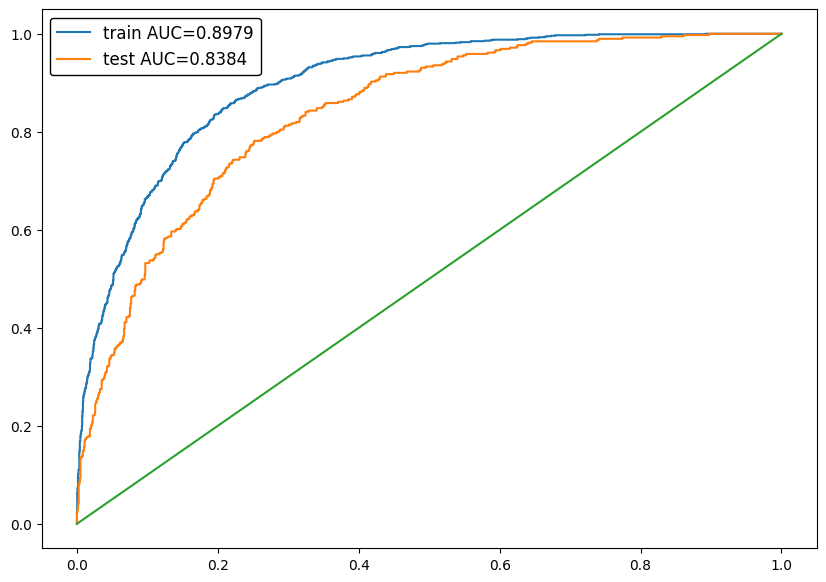

In [22]:
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [26]:
boosting_model = catboost.CatBoostClassifier(
    iterations=1200,  
    learning_rate=0.01,
    random_seed=123,
    custom_loss=['AUC', 'F1']
    
)

boosting_model.fit(
    X_train, 
    y_train, 
    cat_features=cat_cols,
    eval_set=(X_test, y_test),
    verbose=100,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6860084	test: 0.6857750	best: 0.6857750 (0)	total: 19.1ms	remaining: 22.9s
10:	learn: 0.6292551	test: 0.6261122	best: 0.6261122 (10)	total: 163ms	remaining: 17.6s
20:	learn: 0.5840158	test: 0.5792669	best: 0.5792669 (20)	total: 329ms	remaining: 18.5s
30:	learn: 0.5500654	test: 0.5442824	best: 0.5442824 (30)	total: 486ms	remaining: 18.3s
40:	learn: 0.5231864	test: 0.5171726	best: 0.5171726 (40)	total: 649ms	remaining: 18.4s
50:	learn: 0.5024471	test: 0.4964977	best: 0.4964977 (50)	total: 824ms	remaining: 18.6s
60:	learn: 0.4857686	test: 0.4800011	best: 0.4800011 (60)	total: 998ms	remaining: 18.6s
70:	learn: 0.4714619	test: 0.4658789	best: 0.4658789 (70)	total: 1.21s	remaining: 19.3s
80:	learn: 0.4597009	test: 0.4546635	best: 0.4546635 (80)	total: 1.4s	remaining: 19.3s
90:	learn: 0.4497960	test: 0.4463117	best: 0.4463117 (90)	total: 1.58s	remaining: 19.2s
100:	learn: 0.4424080	test: 0.4399350	best: 0.4399350 (100)	total: 1.75s	remaining: 19s
110:	learn: 0.4360382	test: 0.4346

930:	learn: 0.3604905	test: 0.4096616	best: 0.4079587 (468)	total: 16.1s	remaining: 4.67s
940:	learn: 0.3599401	test: 0.4096117	best: 0.4079587 (468)	total: 16.3s	remaining: 4.5s
950:	learn: 0.3592534	test: 0.4095489	best: 0.4079587 (468)	total: 16.5s	remaining: 4.33s
960:	learn: 0.3587259	test: 0.4096359	best: 0.4079587 (468)	total: 16.7s	remaining: 4.15s
970:	learn: 0.3581736	test: 0.4096610	best: 0.4079587 (468)	total: 16.9s	remaining: 3.98s
980:	learn: 0.3574261	test: 0.4097145	best: 0.4079587 (468)	total: 17.1s	remaining: 3.81s
990:	learn: 0.3570602	test: 0.4097959	best: 0.4079587 (468)	total: 17.3s	remaining: 3.64s
1000:	learn: 0.3563701	test: 0.4098352	best: 0.4079587 (468)	total: 17.5s	remaining: 3.47s
1010:	learn: 0.3559014	test: 0.4099110	best: 0.4079587 (468)	total: 17.6s	remaining: 3.3s
1020:	learn: 0.3555167	test: 0.4099182	best: 0.4079587 (468)	total: 17.8s	remaining: 3.12s
1030:	learn: 0.3550744	test: 0.4098936	best: 0.4079587 (468)	total: 18s	remaining: 2.95s
1040:	lear

In [40]:
from catboost import cv
from catboost import Pool

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 1200
params['custom_loss'] = 'AUC'
params['random_seed'] = 123
params['learning_rate'] = 0.01
params['task_type'] = 'GPU'
params['l2_leaf_reg'] = 3
params['bagging_temperature'] = 1
params['random_strength'] = 1
params['one_hot_max_size'] = 2
params['leaf_estimation_method'] = 'Newton'

cv_data = cv(
    params = params,
    pool = Pool(X_train, label=y_train, cat_features=cat_cols),
    fold_count=5,
    shuffle=True,
    partition_random_seed=123,
    plot=True,
    stratified=True,
    verbose=100
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


Training on fold [0/5]
0:	learn: 0.6865904	test: 0.6865961	best: 0.6865961 (0)	total: 89ms	remaining: 1m 46s
100:	learn: 0.4420649	test: 0.4451185	best: 0.4451185 (100)	total: 7.87s	remaining: 1m 25s
200:	learn: 0.4051062	test: 0.4131942	best: 0.4131942 (200)	total: 15.5s	remaining: 1m 17s
300:	learn: 0.3912493	test: 0.4056554	best: 0.4056554 (300)	total: 23.2s	remaining: 1m 9s
400:	learn: 0.3828662	test: 0.4031537	best: 0.4031537 (400)	total: 31s	remaining: 1m 1s
500:	learn: 0.3773380	test: 0.4026122	best: 0.4026100 (495)	total: 38.8s	remaining: 54.1s
600:	learn: 0.3722356	test: 0.4020787	best: 0.4020189 (565)	total: 46.7s	remaining: 46.5s
700:	learn: 0.3680146	test: 0.4021550	best: 0.4020189 (565)	total: 54.7s	remaining: 38.9s
800:	learn: 0.3644399	test: 0.4023859	best: 0.4020189 (565)	total: 1m 2s	remaining: 31.1s
900:	learn: 0.3615438	test: 0.4024353	best: 0.4020189 (565)	total: 1m 9s	remaining: 23.2s
1000:	learn: 0.3586213	test: 0.4026462	best: 0.4020189 (565)	total: 1m 17s	remain

In [41]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.686475,0.000249,0.686370,0.000147,0.812998,0.011342
1,5,0.656115,0.001292,0.655318,0.000972,0.831928,0.012062
2,10,0.628786,0.001963,0.627328,0.001165,0.833004,0.014627
3,15,0.605598,0.002222,0.603254,0.001525,0.832840,0.013367
4,20,0.585223,0.002629,0.582113,0.001844,0.834676,0.012994


In [42]:
cv_data.iloc[cv_data['test-AUC-mean'].argmax(), :]

iterations            605.000000
test-Logloss-mean       0.414307
test-Logloss-std        0.013885
train-Logloss-mean      0.370535
train-Logloss-std       0.004321
test-AUC-mean           0.849991
test-AUC-std            0.011657
Name: 121, dtype: float64

In [46]:
tunned_model = catboost.CatBoostClassifier(
    random_seed=123,
    loss_function='Logloss',
    custom_loss='AUC',
    task_type = 'GPU',
    iterations=700,
    learning_rate=0.01,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_cols,
    verbose=50,
    eval_set=(X_test, y_test),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	learn: 0.6863785	test: 0.6862151	best: 0.6862151 (0)	total: 92.4ms	remaining: 1m 4s
50:	learn: 0.5000705	test: 0.4975638	best: 0.4975638 (50)	total: 4.17s	remaining: 53s
100:	learn: 0.4409400	test: 0.4413603	best: 0.4413603 (100)	total: 7.96s	remaining: 47.2s
150:	learn: 0.4164067	test: 0.4209072	best: 0.4209072 (150)	total: 11.9s	remaining: 43.2s
200:	learn: 0.4047950	test: 0.4130641	best: 0.4130641 (200)	total: 15.7s	remaining: 39s
250:	learn: 0.3976410	test: 0.4098760	best: 0.4098760 (250)	total: 19.7s	remaining: 35.2s
300:	learn: 0.3928453	test: 0.4085312	best: 0.4085312 (300)	total: 23.7s	remaining: 31.5s
350:	learn: 0.3892096	test: 0.4080252	best: 0.4080252 (350)	total: 27.6s	remaining: 27.5s
400:	learn: 0.3859431	test: 0.4076510	best: 0.4076510 (400)	total: 31.6s	remaining: 23.6s
450:	learn: 0.3832148	test: 0.4077822	best: 0.4076510 (400)	total: 35.6s	remaining: 19.7s
500:	learn: 0.3807537	test: 0.4079386	best: 0.4076510 (400)	total: 39.5s	remaining: 15.7s
550:	learn: 0.37857

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

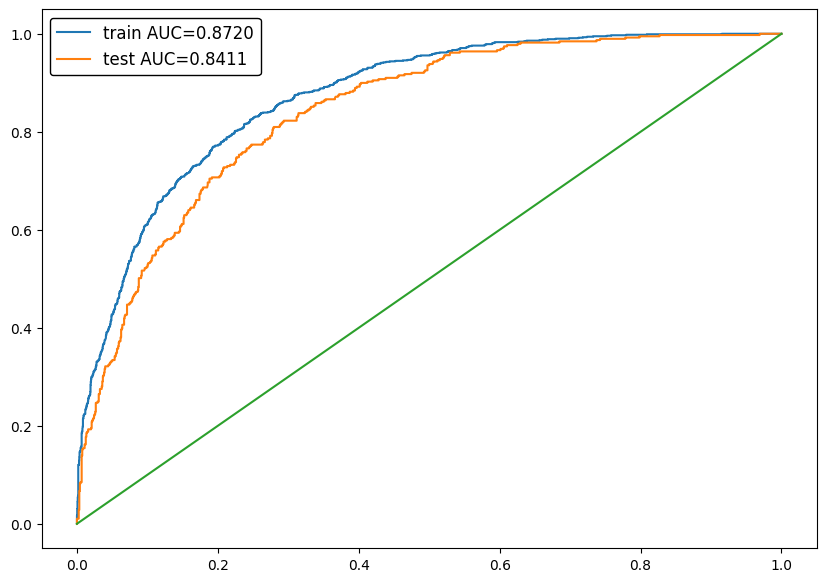

In [48]:
y_train_predicted = tunned_model.predict_proba(X_train)[:, 1]
y_test_predicted = tunned_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [49]:
tunned_model.get_params()

{'iterations': 700,
 'learning_rate': 0.01,
 'l2_leaf_reg': 3,
 'loss_function': 'Logloss',
 'leaf_estimation_method': 'Newton',
 'random_seed': 123,
 'one_hot_max_size': 2,
 'random_strength': 1,
 'custom_loss': 'AUC',
 'bagging_temperature': 1,
 'task_type': 'GPU'}

# Предсказания

In [52]:
finish_model = catboost.CatBoostClassifier(
    random_seed=123,
    loss_function='Logloss',
    custom_loss='AUC',
    task_type = 'GPU',
    iterations=500,
    learning_rate=0.01,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)

finish_model.fit(
    X_train, y_train,
    cat_features=cat_cols,
    verbose=50,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	learn: 0.6863785	total: 87.9ms	remaining: 43.8s
50:	learn: 0.5000705	total: 4.05s	remaining: 35.7s
100:	learn: 0.4409400	total: 7.78s	remaining: 30.8s
150:	learn: 0.4164067	total: 11.6s	remaining: 26.8s
200:	learn: 0.4047950	total: 15.4s	remaining: 22.9s
250:	learn: 0.3976410	total: 19.2s	remaining: 19.1s
300:	learn: 0.3928453	total: 23.1s	remaining: 15.2s
350:	learn: 0.3892096	total: 27.1s	remaining: 11.5s
400:	learn: 0.3859431	total: 30.9s	remaining: 7.63s
450:	learn: 0.3832148	total: 34.8s	remaining: 3.78s
499:	learn: 0.3807916	total: 38.5s	remaining: 0us


In [56]:
X_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/submission.csv')

In [58]:
submission['Churn'] = finish_model.predict_proba(X_test)[:, 1]
submission.to_csv('data/my_submission.csv', index=False)

Лучшее решение отправьте в Stepik.